In [1]:
import numpy as np
import pyfits
import math
from math import log10
import matplotlib.pyplot as plt
import scipy
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
from matplotlib import rc
import pickle
import os
import astropy as ap
from astropy.cosmology import WMAP7
import seaborn as sns
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from matplotlib import colors


#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times'], 'size': 15})
rc('text', usetex=True)      

SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 17

plt.rc('font', size=SMALL_SIZE) 
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

In [2]:
os.chdir('/Users/nitya/Work/Data/Project1/measurements')

In [3]:

file_alpha = open(r'interpolated_data.pkl', 'rb')
d = pickle.load(file_alpha, encoding ='latin1')
file_alpha.close()


file_beta = open(r'binned_data.pkl', 'rb')
q = pickle.load(file_beta, encoding ='latin1')
file_beta.close()

print(d.dtype.names)
print(q.dtype.names)

('nsaid', 'z', 'opt', 'inf', 'mass', 'magsfr', 'magphys', 'uv', 'uvssfr', 'env')
('bin', 'opt', 'inf', 'mass', 'logmass', 'magsfr', 'magphys', 'uvsfr', 'uv', 'env', 'counts')


In [4]:
import seaborn as sns

counts = q['counts']
print(len(counts))

ind = np.where(counts>=5)[0]

print(len(q[ind]))

444
317


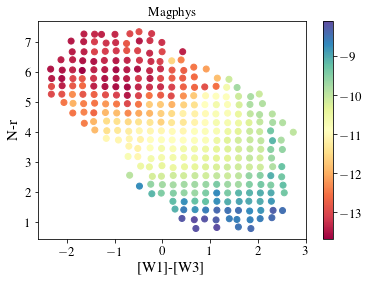

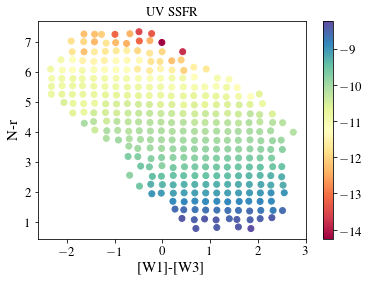

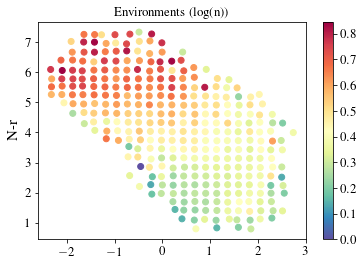

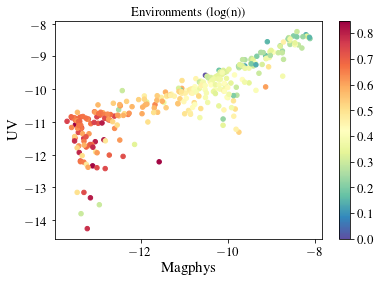

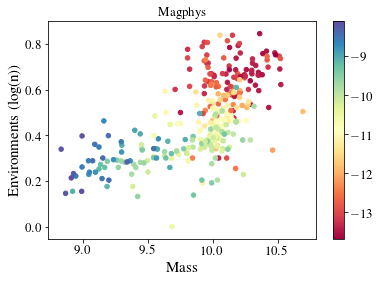

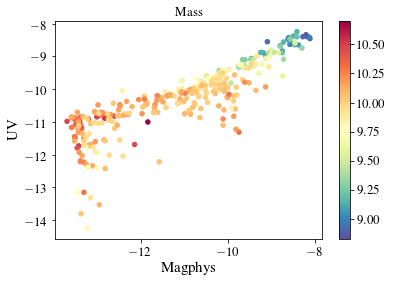

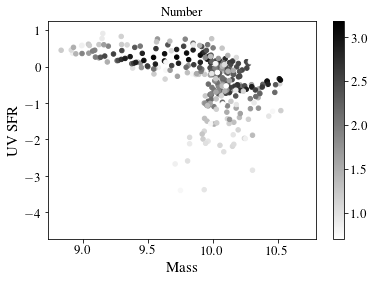

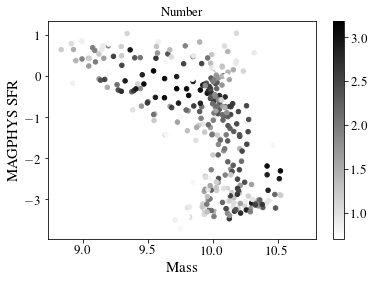

In [5]:
os.chdir('/Users/nitya/Work/Plots/Project1')



plt.scatter(q['inf'][ind],q['opt'][ind],c = q['magphys'][ind], cmap = plt.cm.Spectral)
plt.ylabel('N-r')
plt.xlabel('[W1]-[W3]')
plt.title('Magphys')
plt.colorbar()
#plt.savefig('binned_magphys.pdf')
plt.show()

plt.scatter(q['inf'][ind],q['opt'][ind],c = q['uv'][ind], cmap = plt.cm.Spectral)
plt.ylabel('N-r')
plt.xlabel('[W1]-[W3]')
plt.title('UV SSFR')
plt.colorbar()
#plt.savefig('binned_uv.pdf')
plt.show()




plt.scatter(q['inf'][ind],q['opt'][ind],c = np.log10(q['env'][ind]), cmap = plt.cm.Spectral_r)
plt.ylabel('N-r')
plt.title('Environments (log(n))')
plt.colorbar()
#plt.savefig('binned_env.pdf')
plt.show()



plt.scatter(q['magphys'][ind],q['uv'][ind],c = np.log10(q['env'][ind]),s = 20, cmap = plt.cm.Spectral_r)
plt.xlabel('Magphys')
plt.ylabel('UV')
plt.title('Environments (log(n))')
plt.colorbar()
#plt.savefig('binned_env_uv_magphys.pdf')
plt.show()


plt.scatter(q['logmass'][ind],np.log10(q['env'][ind]),c = q['magphys'][ind],s = 20, cmap = plt.cm.Spectral)
plt.xlabel('Mass')
plt.ylabel('Environments (log(n))')
plt.title('Magphys')
plt.colorbar()
#plt.savefig('binned_mass_env_magphys1.pdf')
plt.show()


plt.scatter(q['magphys'][ind],q['uv'][ind],c = q['logmass'][ind],s = 20, cmap = plt.cm.Spectral_r)
plt.xlabel('Magphys')
plt.ylabel('UV')
plt.title('Mass')
plt.colorbar()
#plt.savefig('binned_mass_env_magphys2.pdf')
plt.show()

plt.scatter(q['logmass'][ind],q['uvsfr'][ind],c = np.log10(q['counts'][ind]),s = 20, cmap = plt.cm.binary)
plt.xlabel('Mass')
plt.ylabel('UV SFR')
plt.title('Number')
plt.colorbar()
#plt.savefig('binned_mass_uv.pdf')
plt.show()

plt.scatter(q['logmass'][ind],q['magsfr'][ind],c = np.log10(q['counts'][ind]),s = 20, cmap = plt.cm.binary)
plt.xlabel('Mass')
plt.ylabel('MAGPHYS SFR')
plt.title('Number')
plt.colorbar()
#plt.savefig('binned_mass_magphys.pdf')
plt.show()
